In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import datetime
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
%matplotlib inline

In [3]:
import os
cwd = os.getcwd()
cwd

'/Users/denizkardesbirinci/Downloads/Movement-of-People-main'

In [13]:
df14 = pd.read_csv("~/Downloads/Movement-of-People-main/data/14clean_data.csv")
df14.head()

,Date/Time,Lat,Lon,Base,Year,Month of Year,Month,Days of Week,Days of Month,Hour,Minute,Date,Time
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,2014,September,9,Monday,1,0,1,2014-09-01,00:01:00
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,2014,September,9,Monday,1,0,1,2014-09-01,00:01:00
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,2014,September,9,Monday,1,0,3,2014-09-01,00:03:00
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,2014,September,9,Monday,1,0,6,2014-09-01,00:06:00
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,2014,September,9,Monday,1,0,11,2014-09-01,00:11:00


In [18]:
df14['Days of Week'].value_counts()

Thursday     741372
Friday       727532
Wednesday    683604
Tuesday      651753
Saturday     634194
Monday       532133
Sunday       481158
Name: Days of Week, dtype: int64

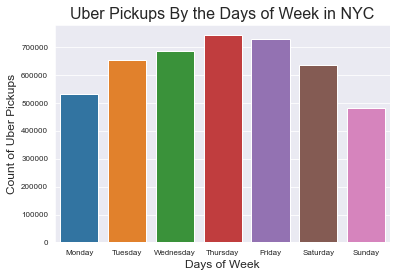

In [21]:
# Uber pickups by the days of week in NYC
sns.set_style('darkgrid')
ax = sns.countplot(x="Days of Week", data=df14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Days of Week', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Uber Pickups By the Days of Week in NYC', fontsize=16)
ax.tick_params(labelsize = 8)
plt.show()

In [32]:
df14['Month of Year'].value_counts()

September    1004099
August        813393
July          781969
June          653158
May           642360
April         556767
Name: Month of Year, dtype: int64

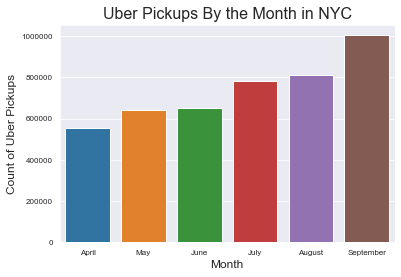

In [36]:
# Uber pickups by the month in NYC
sns.set_style('darkgrid')
ax = sns.countplot(x="Month of Year", data=df14, order = df14['Month of Year'].value_counts(ascending=True).index)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Uber Pickups By the Month in NYC', fontsize=16)
ax.tick_params(labelsize = 8)
plt.show()

In [37]:
#group the data by Month of Years by Days of Week
summary1 = df14.groupby(['Month of Year', 'Days of Week'])['Time'].count()

In [38]:
#reset index
summary1 = summary1.reset_index()
#convert to dataframe
summary1 = pd.DataFrame(summary1)
#browse data
summary1.head()

,Month of Year,Days of Week,Time
0,April,Friday,88985
1,April,Monday,60075
2,April,Saturday,76152
3,April,Sunday,50524
4,April,Thursday,83954


In [39]:
#rename last column
summary1=summary1.rename(columns = {'Time':'Counts'})

In [40]:
summary1.head()

,Month of Year,Days of Week,Counts
0,April,Friday,88985
1,April,Monday,60075
2,April,Saturday,76152
3,April,Sunday,50524
4,April,Thursday,83954


In [63]:
# set categorical order
summary1['Days of Week'] = pd.Categorical(summary1['Days of Week'],
                                   categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                                   ordered=True)

In [60]:
summary1.head()

,Month of Year,Days of Week,Counts
0,April,Friday,88985
1,April,Monday,60075
2,April,Saturday,76152
3,April,Sunday,50524
4,April,Thursday,83954


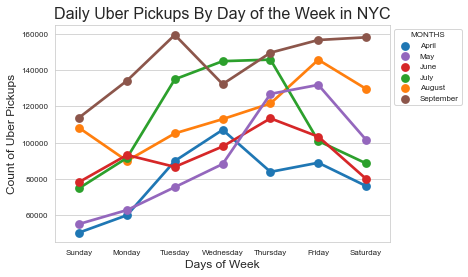

In [120]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Days of Week", y="Counts", hue="Month of Year", data=summary1)
handles,labels = ax.get_legend_handles_labels()
#reordering legend content
handles = [handles[0], handles[4], handles[3], handles[2], handles[1], handles[5]]
labels = [labels[0], labels[4], labels[3], labels[2], labels[1], labels[5]]
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Days of Week', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Daily Uber Pickups By Day of the Week in NYC', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc = 2, bbox_to_anchor = (1,1), title="MONTHS", prop={'size':8})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

# Holiday 

In [66]:
holiday = pd.read_csv("~/Downloads/Movement-of-People-main/holiday.txt")
holiday

,Date,Name
0,2014/05/26,"""Memorial Day"""
1,2014/06/19,"""Juneteenth"""
2,2014/07/04,"""Independence Day"""
3,2014/09/01,"""Labor Day"""


In [67]:
rides_by_date = pd.read_csv("~/Downloads/Movement-of-People-main/data/rides_by_date.csv")
rides_by_date.head()

,Unnamed: 0,Total Rides,7-Day Average Rides
0,2014-04-01,14546,14546.000000
1,2014-04-02,17474,16010.000000
2,2014-04-03,20701,17573.666667
3,2014-04-04,26714,19858.750000
4,2014-04-05,19521,19791.200000


In [68]:
rides_by_date.columns = ['Date','Total Rides', '7-Day Average Rides']

In [69]:
rides_by_date.head()

,Date,Total Rides,7-Day Average Rides
0,2014-04-01,14546,14546.000000
1,2014-04-02,17474,16010.000000
2,2014-04-03,20701,17573.666667
3,2014-04-04,26714,19858.750000
4,2014-04-05,19521,19791.200000


In [87]:
labor_day = rides_by_date[(rides_by_date.Date > "2014-08-28") & (rides_by_date.Date < "2014-09-05")]
labor_day = pd.DataFrame(labor_day)
labor_day

,Date,Total Rides,7-Day Average Rides
150,2014-08-29,27424,25545.000000
151,2014-08-30,23930,25092.571429
152,2014-08-31,23271,25269.000000
153,2014-09-01,19961,24964.428571
154,2014-09-02,28831,25576.000000
155,2014-09-03,32631,26377.857143
156,2014-09-04,38360,27772.571429


In [88]:
labor_day["Date"].replace({"2014-08-29": "3-day before", 
                           "2014-08-30": "2-day before",
                           "2014-08-31": "1-day before",
                           "2014-09-01": "holiday",
                           "2014-09-02": "1-day after",
                           "2014-09-03": "2-day after",
                           "2014-09-04": "3-day after",
                          }, inplace=True)
labor_day

,Date,Total Rides,7-Day Average Rides
150,3-day before,27424,25545.000000
151,2-day before,23930,25092.571429
152,1-day before,23271,25269.000000
153,holiday,19961,24964.428571
154,1-day after,28831,25576.000000
155,2-day after,32631,26377.857143
156,3-day after,38360,27772.571429


In [100]:
hol_name1 = ['Labor Day', 'Labor Day','Labor Day','Labor Day','Labor Day','Labor Day','Labor Day']

labor_day['Holiday Name'] = hol_name1
  
labor_day

,Date,Total Rides,7-Day Average Rides,Holiday Name
150,3-day before,27424,25545.000000,Labor Day
151,2-day before,23930,25092.571429,Labor Day
152,1-day before,23271,25269.000000,Labor Day
153,holiday,19961,24964.428571,Labor Day
154,1-day after,28831,25576.000000,Labor Day
155,2-day after,32631,26377.857143,Labor Day
156,3-day after,38360,27772.571429,Labor Day


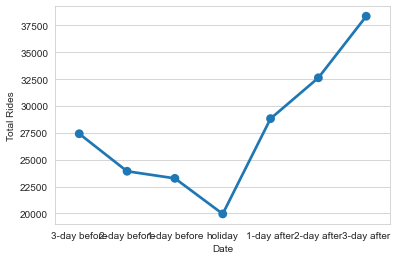

In [101]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Date", y="Total Rides",  data=labor_day)

In [102]:
juneteenth = rides_by_date[(rides_by_date.Date > "2014-06-15") & (rides_by_date.Date < "2014-06-23")]
juneteenth = pd.DataFrame(juneteenth)
juneteenth

,Date,Total Rides,7-Day Average Rides
76,2014-06-16,17778,23036.714286
77,2014-06-17,21807,22884.285714
78,2014-06-18,24647,22731.571429
79,2014-06-19,28594,22553.000000
80,2014-06-20,24271,21562.142857
81,2014-06-21,19940,21649.714286
82,2014-06-22,16322,21908.428571


In [103]:
juneteenth["Date"].replace({"2014-06-16": "3-day before", 
                           "2014-06-17": "2-day before",
                           "2014-06-18": "1-day before",
                           "2014-06-19": "holiday",
                           "2014-06-20": "1-day after",
                           "2014-06-21": "2-day after",
                           "2014-06-22": "3-day after",
                          }, inplace=True)
juneteenth

,Date,Total Rides,7-Day Average Rides
76,3-day before,17778,23036.714286
77,2-day before,21807,22884.285714
78,1-day before,24647,22731.571429
79,holiday,28594,22553.000000
80,1-day after,24271,21562.142857
81,2-day after,19940,21649.714286
82,3-day after,16322,21908.428571


In [104]:
hol_name2 = ['Juneteenth', 'Juneteenth','Juneteenth','Juneteenth','Juneteenth','Juneteenth','Juneteenth']
juneteenth['Holiday Name'] = hol_name2
juneteenth

,Date,Total Rides,7-Day Average Rides,Holiday Name
76,3-day before,17778,23036.714286,Juneteenth
77,2-day before,21807,22884.285714,Juneteenth
78,1-day before,24647,22731.571429,Juneteenth
79,holiday,28594,22553.000000,Juneteenth
80,1-day after,24271,21562.142857,Juneteenth
81,2-day after,19940,21649.714286,Juneteenth
82,3-day after,16322,21908.428571,Juneteenth


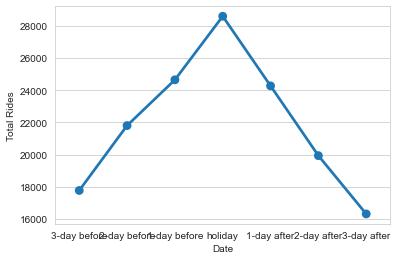

In [105]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Date", y="Total Rides",  data=juneteenth)

In [94]:
independence = rides_by_date[(rides_by_date.Date > "2014-06-30") & (rides_by_date.Date < "2014-07-08")]
independence = pd.DataFrame(independence)
independence

,Date,Total Rides,7-Day Average Rides
91,2014-07-01,21228,22544.142857
92,2014-07-02,26480,22547.000000
93,2014-07-03,21597,21558.571429
94,2014-07-04,14148,20023.285714
95,2014-07-05,10890,18549.285714
96,2014-07-06,11443,17740.142857
97,2014-07-07,18280,17723.714286


In [95]:
independence["Date"].replace({"2014-07-01": "3-day before", 
                           "2014-07-02": "2-day before",
                           "2014-07-03": "1-day before",
                           "2014-07-04": "holiday",
                           "2014-07-05": "1-day after",
                           "2014-07-06": "2-day after",
                           "2014-07-07": "3-day after",
                          }, inplace=True)
independence

,Date,Total Rides,7-Day Average Rides
91,3-day before,21228,22544.142857
92,2-day before,26480,22547.000000
93,1-day before,21597,21558.571429
94,holiday,14148,20023.285714
95,1-day after,10890,18549.285714
96,2-day after,11443,17740.142857
97,3-day after,18280,17723.714286


In [106]:
hol_name3 = ['Independence Day', 'Independence Day','Independence Day','Independence Day','Independence Day','Independence Day','Independence Day']

independence['Holiday Name'] = hol_name3
independence

,Date,Total Rides,7-Day Average Rides,Holiday Name
91,3-day before,21228,22544.142857,Independence Day
92,2-day before,26480,22547.000000,Independence Day
93,1-day before,21597,21558.571429,Independence Day
94,holiday,14148,20023.285714,Independence Day
95,1-day after,10890,18549.285714,Independence Day
96,2-day after,11443,17740.142857,Independence Day
97,3-day after,18280,17723.714286,Independence Day


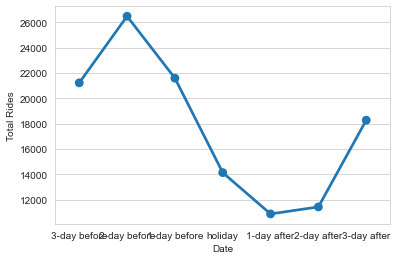

In [107]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Date", y="Total Rides",  data=independence)

In [112]:
memorial_day = rides_by_date[(rides_by_date.Date > "2014-05-22") & (rides_by_date.Date < "2014-05-30")]
memorial_day = pd.DataFrame(memorial_day)
memorial_day

,Date,Total Rides,7-Day Average Rides
52,2014-05-23,26465,22107.428571
53,2014-05-24,14651,21015.571429
54,2014-05-25,10841,20206.000000
55,2014-05-26,10202,19047.000000
56,2014-05-27,17004,18496.142857
57,2014-05-28,22240,18315.000000
58,2014-05-29,24930,18047.571429


In [113]:
memorial_day["Date"].replace({"2014-05-23": "3-day before", 
                           "2014-05-24": "2-day before",
                           "2014-05-25": "1-day before",
                           "2014-05-26": "holiday",
                           "2014-05-27": "1-day after",
                           "2014-05-28": "2-day after",
                           "2014-05-29": "3-day after",
                          }, inplace=True)
memorial_day

,Date,Total Rides,7-Day Average Rides
52,3-day before,26465,22107.428571
53,2-day before,14651,21015.571429
54,1-day before,10841,20206.000000
55,holiday,10202,19047.000000
56,1-day after,17004,18496.142857
57,2-day after,22240,18315.000000
58,3-day after,24930,18047.571429


In [114]:
hol_name4 = ['Memorial Day', 'Memorial Day','Memorial Day','Memorial Day','Memorial Day','Memorial Day','Memorial Day',]
memorial_day['Holiday Name'] = hol_name4
memorial_day

,Date,Total Rides,7-Day Average Rides,Holiday Name
52,3-day before,26465,22107.428571,Memorial Day
53,2-day before,14651,21015.571429,Memorial Day
54,1-day before,10841,20206.000000,Memorial Day
55,holiday,10202,19047.000000,Memorial Day
56,1-day after,17004,18496.142857,Memorial Day
57,2-day after,22240,18315.000000,Memorial Day
58,3-day after,24930,18047.571429,Memorial Day


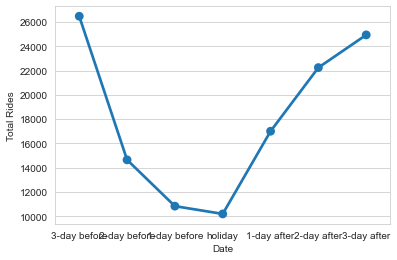

In [115]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Date", y="Total Rides",  data=memorial_day)

In [116]:
data_holiday = pd.concat([labor_day, 
                          juneteenth,
                          independence,
                         memorial_day], 
                          ignore_index = True,
                          sort = False)
print(data_holiday)

            Date  Total Rides  7-Day Average Rides      Holiday Name
0   3-day before        27424         25545.000000         Labor Day
1   2-day before        23930         25092.571429         Labor Day
2   1-day before        23271         25269.000000         Labor Day
3        holiday        19961         24964.428571         Labor Day
4    1-day after        28831         25576.000000         Labor Day
5    2-day after        32631         26377.857143         Labor Day
6    3-day after        38360         27772.571429         Labor Day
7   3-day before        17778         23036.714286        Juneteenth
8   2-day before        21807         22884.285714        Juneteenth
9   1-day before        24647         22731.571429        Juneteenth
10       holiday        28594         22553.000000        Juneteenth
11   1-day after        24271         21562.142857        Juneteenth
12   2-day after        19940         21649.714286        Juneteenth
13   3-day after        16322     

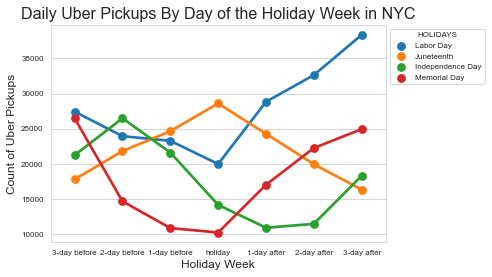

In [119]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Date", y="Total Rides", hue="Holiday Name", data=data_holiday)
handles,labels = ax.get_legend_handles_labels()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Holiday Week', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Daily Uber Pickups By Day of the Holiday Week in NYC', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc = 2, bbox_to_anchor = (1,1), title="HOLIDAYS", prop={'size':8})
ax.get_legend().get_title().set_fontsize('8')
plt.show()